In [1]:
import pandas as pd
import nltk
import sklearn
import textblob
from textblob import TextBlob
import matplotlib
import seaborn
#nltk.download()

In [2]:
dataset=pd.read_csv("C:\\Users\\amanj\\Downloads\\fake-news\\train.csv",encoding="latin-1")

In [3]:
dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
dataset['text']=dataset.text.astype(str)
dataset['title']=dataset.text.astype(str)

In [5]:
dataset['polarity']=dataset['text'].apply(lambda tweet:TextBlob(tweet).sentiment.polarity)

In [6]:
dataset['subjectivity']=dataset['text'].apply(lambda tweet:TextBlob(tweet).sentiment.subjectivity)


In [7]:
dataset.head()

,id,title,author,text,label,polarity,subjectivity
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1,0.006898,0.489636
1,1,Ever get the feeling your life circles the rou...,Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,0.106126,0.496322
2,2,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,0.044527,0.406205
3,3,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,0.017497,0.262625
4,4,Print \nAn Iranian woman has been sentenced to...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,-0.012500,0.112500


In [8]:
#import dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
import re
from nltk.stem.porter import PorterStemmer
import time
from nltk import FreqDist
from scipy.stats import entropy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
matplotlib.style.use('ggplot')
from subprocess import check_output
from nltk.tokenize import ToktokTokenizer
toktok=ToktokTokenizer()

In [9]:
df=dataset
df.head()
df.tail()

,id,title,author,text,label,polarity,subjectivity
20795,20795,Rapper T. I. unloaded on black celebrities who...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0,0.059881,0.418214
20796,20796,When the Green Bay Packers lost to the Washing...,Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0,0.050297,0.413826
20797,20797,The Macyâs of today grew from the union of s...,Michael J. de la Merced and Rachel Abrams,The Macyâs of today grew from the union of s...,0,0.112540,0.466389
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1,-0.019426,0.209632
20799,20799,"David Swanson is an author, activist, journa...",David Swanson,"David Swanson is an author, activist, journa...",1,0.077487,0.449643


In [10]:
import re
def initial_clean(text):
    """
    Function to clear text of websites,email addresses and any punctuation
    We also lower case the text
    """
    text=re.sub("((\S+)?(http(s)?)(\S+))|((\S+)?(www)(\S+))|((\S+)?(\@)(\S+)?)"," ",text)
    text=re.sub("[^a-zA-Z]"," ",text)
    text=text.lower()
    #text=nltk.word_tokenize(text)
    text=toktok.tokenize(text)
    return text
stop_words=stopwords.words('english')
def remove_stop_words(text):
    '''
    Function that removes all stopwords from text
    '''
    return [word for word in text if word not in stop_words]
stemmer=PorterStemmer()
def stem_words(text):
    '''
    Function to stem words so that plural and singular are treated the same
    '''
    try:
        text=[stemmer.stem(word) for word in text]
        text=[word for word in text if len(word)>1] #make sure we have no 1 letter words
    except IndexError: #the word 'oed' broke this,so needed try except
        pass
    return text
def apply_all(text):
    '''
    This function applies all the function above into one
    '''
    return stem_words(remove_stop_words(initial_clean(text)))

In [11]:
df['title']=df.title.astype(str)

In [12]:
#clean text and title and create new column 'tokenized'
import time
t1=time.time()
df['tokenized']=df['text'].apply(apply_all) + df['title'].apply(apply_all)
t2=time.time()
print("Time to clean and tokenize",len(df),"articles: ",(t2-t1)/60,"min")


Time to clean and tokenize 20800 articles:  12.663075383504232 min


In [13]:
df['tokenized']

0        [hous, dem, aid, even, see, comey, letter, jas...
1        [ever, get, feel, life, circl, roundabout, rat...
2        [truth, might, get, fire, octob, tension, inte...
3        [video, civilian, kill, singl, us, airstrik, i...
4        [print, iranian, woman, sentenc, six, year, pr...
                               ...                        
20795    [rapper, unload, black, celebr, met, donald, t...
20796    [green, bay, packer, lost, washington, redskin...
20797    [maci, today, grew, union, sever, great, name,...
20798    [nato, russia, hold, parallel, exercis, balkan...
20799    [david, swanson, author, activist, journalist,...
Name: tokenized, Length: 20800, dtype: object

"#first get a list of all words\nall_words=[word for item in list(df['tokenized']) for word in item]\n#use nltk fdist to get a frequency distribution of all words\nfdist=FreqDist(all_words)\nlen(fdist) #number of unique words\n"

'k=2500\ntop_k_words=fdist.most_common(k)\ntop_k_words[-10:]\n'

"\n#define a function only to keep words in the top k words\ntop_k_words,_=zip(*fdist.most_common(k))\ntop_k_words=set(top_k_words)\ndef keep_top_k_words(text):\n    return[word for word in text if word in top_k_words]\ndf['tokenized']=df['tokenized'].apply(keep_top_k_words)\n"

In [17]:
#document length
df['doc_len']=df['tokenized'].apply(lambda x:len(x))
doc_lengths=list(df['doc_len'])
df.drop(labels='doc_len',axis=1,inplace=True)
print("length of list: ",len(doc_lengths),
     "\naverage document length",np.average(doc_lengths),
     "\nminimum document length",min(doc_lengths),
     "\nmaximum document length",max(doc_lengths))
from scipy.stats import iqr
print(iqr(doc_lengths))

length of list:  20800 
average document length 827.0342307692308 
minimum document length 0 
maximum document length 23918
850.0


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


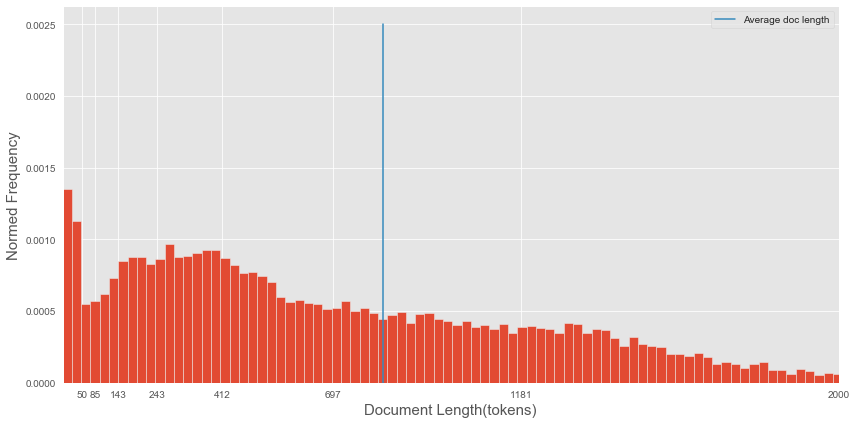

In [18]:
#plot a histogram of document length
#bins=max-min/h where h=2xIQRxn^-(1/3)
num_bins=1000
fig,ax=plt.subplots(figsize=(12,6))
#the histogram of the data
n,bins,patches =ax.hist(doc_lengths,num_bins,normed=1)
ax.set_xlabel('Document Length(tokens)',fontsize=15)
ax.set_ylabel('Normed Frequency',fontsize=15)
ax.grid()
ax.set_xticks(np.logspace(start=np.log10(50),stop=np.log10(2000),num=8,base=10.0))
plt.xlim(0,2000)
ax.plot([np.average(doc_lengths) for i in np.linspace(0.0,0.0025,100)],np.linspace(0.0,0.0025,100),label='Average doc length')
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

In [19]:
#only keep articles with more than 25 tokens,otherwise too short
df=df[df['tokenized'].map(len)>=25]
#make sure all tokenized items are lists
df=df[df['tokenized'].map(type)==list]
df.reset_index(drop=True,inplace=True)
print("After cleaning and excluding short articles, the dataframe now has: ",len(df),"articles")
df.head()

After cleaning and excluding short articles, the dataframe now has:  20093 articles


,id,title,author,text,label,polarity,subjectivity,tokenized
0,0,House Dem Aide: We Didnât Even See Comeyâs...,Darrell Lucus,House Dem Aide: We Didnât Even See Comeyâs...,1,0.006898,0.489636,"[hous, dem, aid, even, see, comey, letter, jas..."
1,1,Ever get the feeling your life circles the rou...,Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,0.106126,0.496322,"[ever, get, feel, life, circl, roundabout, rat..."
2,2,"Why the Truth Might Get You Fired October 29, ...",Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,0.044527,0.406205,"[truth, might, get, fire, octob, tension, inte..."
3,3,Videos 15 Civilians Killed In Single US Airstr...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,0.017497,0.262625,"[video, civilian, kill, singl, us, airstrik, i..."
4,4,Print \nAn Iranian woman has been sentenced to...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,-0.012500,0.112500,"[print, iranian, woman, sentenc, six, year, pr..."


In [20]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(df,test_size=0.2)
from nltk.corpus import stopwords
train.columns.values
train.head()

,id,title,author,text,label,polarity,subjectivity,tokenized
5972,6192,"Russia, facing deepening scrutiny over accusat...",Mike McPhate,"Russia, facing deepening scrutiny over accusat...",0,0.008319,0.363958,"[russia, face, deepen, scrutini, accus, orches..."
19410,20097,Few actresses are more likable than Emma Stone...,Bee Shapiro,Few actresses are more likable than Emma Stone...,0,0.156847,0.435389,"[actress, likabl, emma, stone, spunki, talent,..."
2191,2273,Show up at the polls and vote for Donald Trump...,Ronnie Allen,Show up at the polls and vote for Donald Trump...,1,0.300000,0.485185,"[show, poll, vote, donald, trump, make, sure, ..."
19861,20562,"During Fridayâs Weekly Address, President Do...",Trent Baker,"During Fridayâs Weekly Address, President Do...",0,0.151979,0.438411,"[friday, weekli, address, presid, donald, trum..."
4698,4879,Blair Rollin: Nice quote from The China Study....,Michael Greger M.D. FACLM,Blair Rollin: Nice quote from The China Study....,1,0.122649,0.504764,"[blair, rollin, nice, quot, china, studi, forg..."


In [21]:
train['text']=df.text.astype(str)
train['title']=df.title.astype(str)
test['text']=df.text.astype(str)
test['title']=df.title.astype(str)
import re
def refineWords(s):
    letters_only=re.sub("[^a-zA-Z]"," ",s)
    words=letters_only.lower().split()
    stops=set(stopwords.words("english"))
    meaningful_words=[W for W in words if not W in stops]
    return(" ".join(meaningful_words))
train["text"].fillna(" ",inplace=True)
train["text"]=train["text"].apply(refineWords)
train["title"].fillna(" ",inplace=True)
train["title"]=train["title"].apply(refineWords)
test["title"].fillna(" ",inplace=True)
test["title"]=test["title"].apply(refineWords)
test["text"].fillna(" ",inplace=True)
test["text"]=test["text"].apply(refineWords)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

In [22]:

from sklearn.feature_extraction.text import CountVectorizer
vectorizer=CountVectorizer(analyzer="word",tokenizer=None,preprocessor=None,stop_words=None,max_features=8000)
#print(train_one["title"].head())
#temp=(vectorizer.fit_transform(train_one["text"]))
#train_one["text"]=temp.to_array()
train["text"]=vectorizer.fit_transform(train["text"]).toarray()
train["title"]=vectorizer.fit_transform(train["title"]).toarray()
train.head()
test["text"]=vectorizer.fit_transform(test["text"]).toarray()
test["title"]=vectorizer.fit_transform(test["title"]).toarray()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/ind

In [35]:

from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(max_depth=15,n_estimators=200,random_state=65)
x_train=train[["text","title","polarity","subjectivity"]].values
y_train=train["label"]
modelRF=forest.fit(x_train,y_train)

In [36]:
x_test=test[["text","title","polarity","subjectivity"]].values
y_test=test["label"]
y_pred=modelRF.predict(x_test)

Accuracy of Prediction by Random Forest 59.84075640706643 %
              precision    recall  f1-score   support

           0       0.59      0.72      0.65      2062
           1       0.62      0.47      0.53      1957

    accuracy                           0.60      4019
   macro avg       0.60      0.60      0.59      4019
weighted avg       0.60      0.60      0.59      4019



(1.8, 0.2)

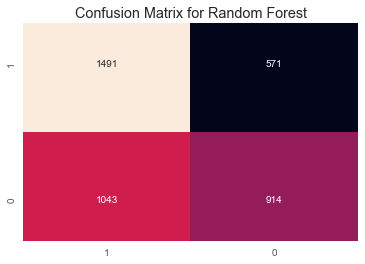

In [37]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
print("Accuracy of Prediction by Random Forest "+str(accuracy_score(y_test,y_pred)*100)+" %")
from sklearn.metrics import confusion_matrix
matrix1=confusion_matrix(y_test,y_pred)
import seaborn as sns
plt.title('Confusion Matrix for Random Forest')
print(classification_report(y_test,y_pred))
x_labels=[1,0]
y_labels=[1,0]
ax=sns.heatmap(matrix1,xticklabels=x_labels,yticklabels=y_labels,annot=True,fmt='g',cbar=False)
ax.set_ylim(1.8,0.2)

Accuracy of Prediction by Naive Bayes 59.492411047524264 %
              precision    recall  f1-score   support

           0       0.59      0.68      0.63      2062
           1       0.60      0.50      0.55      1957

    accuracy                           0.59      4019
   macro avg       0.60      0.59      0.59      4019
weighted avg       0.60      0.59      0.59      4019



(1.8, 0.2)

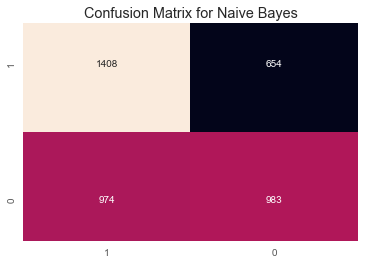

In [41]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
matrix2=confusion_matrix(y_test,y_pred1)
print("Accuracy of Prediction by Naive Bayes "+str(accuracy_score(y_test,y_pred1)*100)+" %")
plt.title('Confusion Matrix for Naive Bayes')
print(classification_report(y_test,y_pred1))
ax=sns.heatmap(matrix2,xticklabels=x_labels,yticklabels=y_labels,annot=True,fmt='g',cbar=False)
ax.set_ylim(1.8,0.2)

Accuracy of Prediction by Support Vector Machine(SVM) 55.088330430455336 %
              precision    recall  f1-score   support

           0       0.54      0.95      0.68      2062
           1       0.70      0.13      0.23      1957

    accuracy                           0.55      4019
   macro avg       0.62      0.54      0.45      4019
weighted avg       0.62      0.55      0.46      4019



(1.8, 0.2)

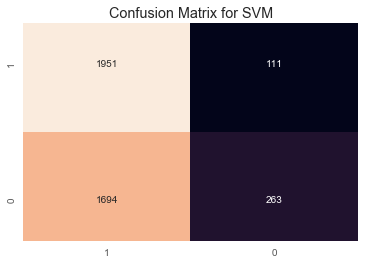

In [27]:
from sklearn.svm import SVC
clf=SVC(kernel='linear')
clf.fit(x_train,train["label"])
y_pred2=clf.predict(x_test)
print("Accuracy of Prediction by Support Vector Machine(SVM) "+str(accuracy_score(y_test,y_pred2)*100)+" %")
matrix3=confusion_matrix(y_test,y_pred2)
plt.title('Confusion Matrix for SVM')
print(classification_report(y_test,y_pred2))
ax=sns.heatmap(matrix3,xticklabels=x_labels,yticklabels=y_labels,annot=True,fmt='g',cbar=False)
ax.set_ylim(1.8,0.2)

D:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy of Prediction by Logistic Regression 58.34784772331426 %
              precision    recall  f1-score   support

           0       0.57      0.76      0.65      2062
           1       0.61      0.40      0.48      1957

    accuracy                           0.58      4019
   macro avg       0.59      0.58      0.57      4019
weighted avg       0.59      0.58      0.57      4019



(1.8, 0.2)

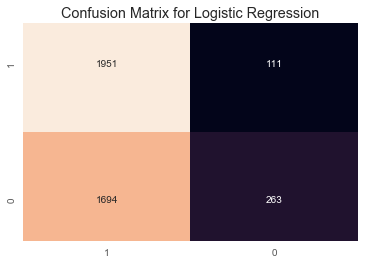

In [49]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(random_state=256)
classifier.fit(x_train,y_train)
y_pred3=classifier.predict(x_test)
print("Accuracy of Prediction by Logistic Regression "+str(accuracy_score(y_test,y_pred3)*100)+" %")
matrix3=confusion_matrix(y_test,y_pred2)
plt.title('Confusion Matrix for Logistic Regression')
print(classification_report(y_test,y_pred3))
ax=sns.heatmap(matrix3,xticklabels=x_labels,yticklabels=y_labels,annot=True,fmt='g',cbar=False)
ax.set_ylim(1.8,0.2)

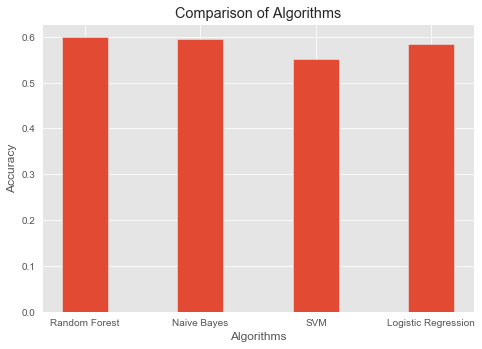

In [62]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
algorithms=["Random Forest","Naive Bayes","SVM","Logistic Regression"]
accuracy=[accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred1),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3)]
ax.bar(algorithms,accuracy,width=0.4)
plt.title("Comparison of Algorithms")
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()